## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.696012 -0.582126  0.575720 -1.366437 -0.405678 -0.276437
1 -0.805032  1.112698 -0.465921  0.924532 -0.398366  0.381769
2  0.050878 -0.985681  0.582002  0.051272 -1.360148 -0.842999
3 -1.255869  0.978800  0.700175 -1.213198  1.325702 -1.162383
4 -0.805973 -0.685711  1.736440 -0.371406  1.592276  0.386367


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0177861	total: 67.3ms	remaining: 1m 7s
1:	learn: 1.0072612	total: 68ms	remaining: 33.9s
2:	learn: 0.9976191	total: 68.5ms	remaining: 22.8s
3:	learn: 0.9876951	total: 69.2ms	remaining: 17.2s
4:	learn: 0.9806356	total: 69.6ms	remaining: 13.9s
5:	learn: 0.9720714	total: 70.2ms	remaining: 11.6s
6:	learn: 0.9614015	total: 70.9ms	remaining: 10.1s
7:	learn: 0.9517837	total: 71.3ms	remaining: 8.85s
8:	learn: 0.9428117	total: 71.8ms	remaining: 7.9s
9:	learn: 0.9341896	total: 72.3ms	remaining: 7.16s
10:	learn: 0.9240953	total: 72.8ms	remaining: 6.54s
11:	learn: 0.9156633	total: 73.3ms	remaining: 6.03s
12:	learn: 0.9079659	total: 73.8ms	remaining: 5.61s
13:	learn: 0.8997842	total: 74.3ms	remaining: 5.23s
14:	learn: 0.8919252	total: 74.7ms	remaining: 4.9s
15:	learn: 0.8848119	total: 75.2ms	remaining: 4.62s
16:	learn: 0.8765480	total: 75.6ms	remaining: 4.37s
17:	learn: 0.8691262	total: 75.9ms	remaining: 4.14s
18:	learn: 0.8630204	total: 76.4ms	remaining: 3.

83:	learn: 0.5083662	total: 108ms	remaining: 1.18s
84:	learn: 0.5046313	total: 109ms	remaining: 1.17s
85:	learn: 0.5019009	total: 110ms	remaining: 1.16s
86:	learn: 0.4987060	total: 110ms	remaining: 1.16s
87:	learn: 0.4952856	total: 111ms	remaining: 1.15s
88:	learn: 0.4915403	total: 111ms	remaining: 1.14s
89:	learn: 0.4882724	total: 112ms	remaining: 1.13s
90:	learn: 0.4861282	total: 112ms	remaining: 1.12s
91:	learn: 0.4818889	total: 113ms	remaining: 1.11s
92:	learn: 0.4782037	total: 113ms	remaining: 1.1s
93:	learn: 0.4748779	total: 114ms	remaining: 1.09s
94:	learn: 0.4714829	total: 114ms	remaining: 1.09s
95:	learn: 0.4682988	total: 115ms	remaining: 1.08s
96:	learn: 0.4647268	total: 115ms	remaining: 1.07s
97:	learn: 0.4613970	total: 116ms	remaining: 1.06s
98:	learn: 0.4582403	total: 116ms	remaining: 1.05s
99:	learn: 0.4541522	total: 117ms	remaining: 1.05s
100:	learn: 0.4520595	total: 117ms	remaining: 1.04s
101:	learn: 0.4484100	total: 118ms	remaining: 1.03s
102:	learn: 0.4454377	total: 1

247:	learn: 0.1745541	total: 188ms	remaining: 569ms
248:	learn: 0.1739193	total: 188ms	remaining: 568ms
249:	learn: 0.1728772	total: 189ms	remaining: 566ms
250:	learn: 0.1719342	total: 189ms	remaining: 565ms
251:	learn: 0.1709725	total: 190ms	remaining: 563ms
252:	learn: 0.1696272	total: 190ms	remaining: 561ms
253:	learn: 0.1684929	total: 191ms	remaining: 560ms
254:	learn: 0.1676854	total: 191ms	remaining: 559ms
255:	learn: 0.1664779	total: 192ms	remaining: 557ms
256:	learn: 0.1655442	total: 192ms	remaining: 556ms
257:	learn: 0.1648027	total: 193ms	remaining: 554ms
258:	learn: 0.1638696	total: 193ms	remaining: 553ms
259:	learn: 0.1628795	total: 194ms	remaining: 551ms
260:	learn: 0.1617626	total: 194ms	remaining: 550ms
261:	learn: 0.1610034	total: 195ms	remaining: 548ms
262:	learn: 0.1600263	total: 196ms	remaining: 549ms
263:	learn: 0.1590049	total: 196ms	remaining: 547ms
264:	learn: 0.1581390	total: 197ms	remaining: 546ms
265:	learn: 0.1572901	total: 197ms	remaining: 544ms
266:	learn: 

469:	learn: 0.0578892	total: 292ms	remaining: 329ms
470:	learn: 0.0575595	total: 292ms	remaining: 328ms
471:	learn: 0.0572398	total: 293ms	remaining: 327ms
472:	learn: 0.0569986	total: 293ms	remaining: 326ms
473:	learn: 0.0567524	total: 293ms	remaining: 326ms
474:	learn: 0.0564412	total: 294ms	remaining: 325ms
475:	learn: 0.0561268	total: 294ms	remaining: 324ms
476:	learn: 0.0558226	total: 295ms	remaining: 323ms
477:	learn: 0.0555870	total: 295ms	remaining: 322ms
478:	learn: 0.0552895	total: 296ms	remaining: 322ms
479:	learn: 0.0549976	total: 296ms	remaining: 321ms
480:	learn: 0.0547834	total: 297ms	remaining: 320ms
481:	learn: 0.0544978	total: 297ms	remaining: 319ms
482:	learn: 0.0542885	total: 297ms	remaining: 318ms
483:	learn: 0.0540091	total: 298ms	remaining: 317ms
484:	learn: 0.0536658	total: 298ms	remaining: 317ms
485:	learn: 0.0534515	total: 299ms	remaining: 316ms
486:	learn: 0.0532435	total: 299ms	remaining: 315ms
487:	learn: 0.0529743	total: 300ms	remaining: 315ms
488:	learn: 

633:	learn: 0.0292418	total: 371ms	remaining: 214ms
634:	learn: 0.0291586	total: 372ms	remaining: 214ms
635:	learn: 0.0290524	total: 372ms	remaining: 213ms
636:	learn: 0.0289594	total: 373ms	remaining: 212ms
637:	learn: 0.0288784	total: 373ms	remaining: 212ms
638:	learn: 0.0287870	total: 374ms	remaining: 211ms
639:	learn: 0.0287335	total: 374ms	remaining: 211ms
640:	learn: 0.0286806	total: 375ms	remaining: 210ms
641:	learn: 0.0285908	total: 375ms	remaining: 209ms
642:	learn: 0.0285385	total: 376ms	remaining: 209ms
643:	learn: 0.0284867	total: 376ms	remaining: 208ms
644:	learn: 0.0284356	total: 377ms	remaining: 207ms
645:	learn: 0.0283473	total: 377ms	remaining: 207ms
646:	learn: 0.0281857	total: 378ms	remaining: 206ms
647:	learn: 0.0280522	total: 378ms	remaining: 205ms
648:	learn: 0.0279212	total: 379ms	remaining: 205ms
649:	learn: 0.0278216	total: 379ms	remaining: 204ms
650:	learn: 0.0276932	total: 379ms	remaining: 203ms
651:	learn: 0.0275326	total: 380ms	remaining: 203ms
652:	learn: 

849:	learn: 0.0123146	total: 475ms	remaining: 83.8ms
850:	learn: 0.0122988	total: 476ms	remaining: 83.3ms
851:	learn: 0.0122529	total: 476ms	remaining: 82.7ms
852:	learn: 0.0122136	total: 477ms	remaining: 82.2ms
853:	learn: 0.0121980	total: 478ms	remaining: 81.8ms
854:	learn: 0.0121299	total: 479ms	remaining: 81.2ms
855:	learn: 0.0120898	total: 479ms	remaining: 80.6ms
856:	learn: 0.0120232	total: 480ms	remaining: 80ms
857:	learn: 0.0119577	total: 480ms	remaining: 79.5ms
858:	learn: 0.0119188	total: 481ms	remaining: 78.9ms
859:	learn: 0.0118547	total: 481ms	remaining: 78.3ms
860:	learn: 0.0118167	total: 482ms	remaining: 77.8ms
861:	learn: 0.0117559	total: 482ms	remaining: 77.2ms
862:	learn: 0.0116962	total: 483ms	remaining: 76.6ms
863:	learn: 0.0116535	total: 483ms	remaining: 76ms
864:	learn: 0.0116164	total: 484ms	remaining: 75.5ms
865:	learn: 0.0115728	total: 484ms	remaining: 74.9ms
866:	learn: 0.0115601	total: 485ms	remaining: 74.4ms
867:	learn: 0.0114967	total: 485ms	remaining: 73.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

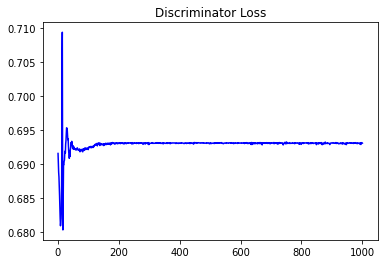

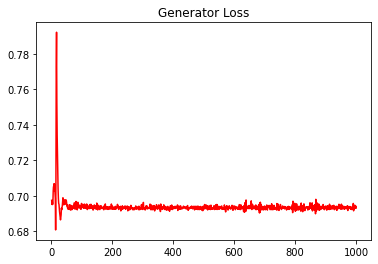

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19043230269751013


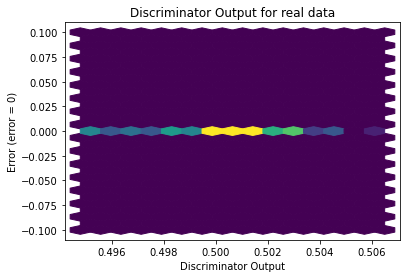

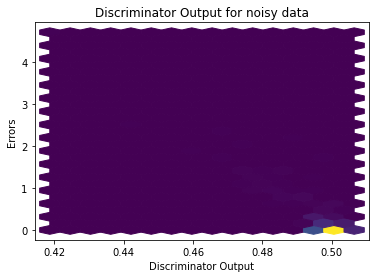

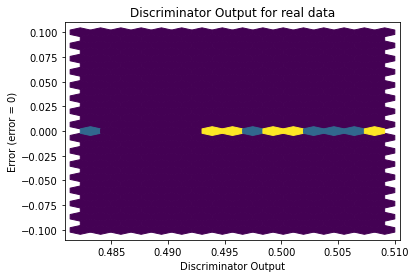

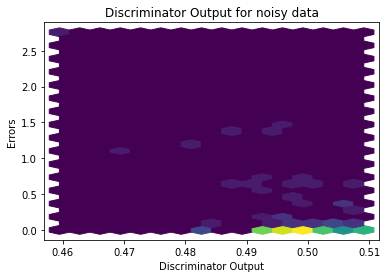

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


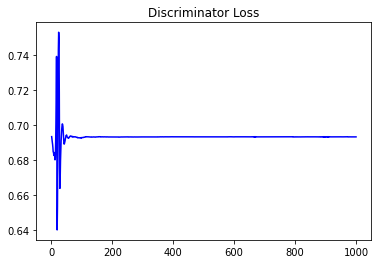

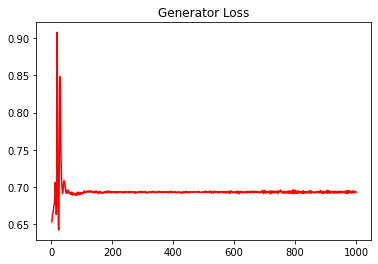

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18534606257081432


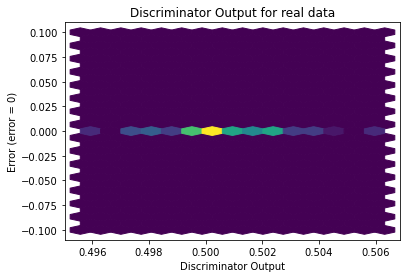

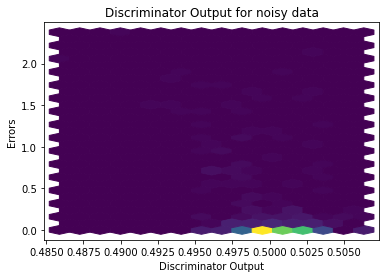

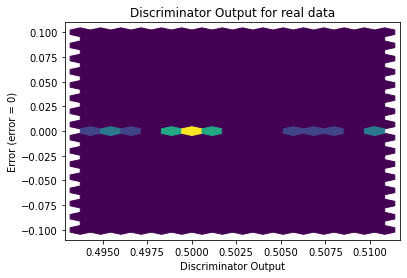

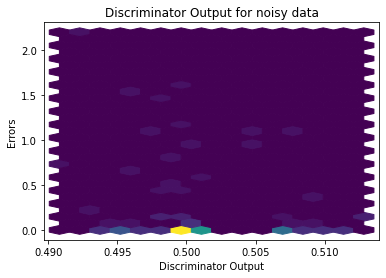

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5397]], requires_grad=True)
